In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_logs= pd.read_csv('logs.csv')
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


#### Количество уникальных значений столбца Platform:

In [3]:
df_logs.platform.nunique()

3

In [6]:
df_user_data= pd.read_csv('user_data.csv')
df_user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


#### Какой клиент совершил больше всего операций?

In [37]:
logs_success=df_logs.query('success==True')\
                     .groupby('client',as_index=False)\
                     .agg({'platform':'count'})\
                     .rename(columns={'platform':'success_count'})\
                     .sort_values('success_count',ascending=False)\

logs_success.head(1)

,client,success_count
332,12179,41


In [27]:
successful_clients= logs_success.query('success_count == 41')\
            .sort_values('client')\
            .client\
            .tolist()
successful_clients

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

#### С какой платформы осуществляется наибольшее количество успешных операций?

In [36]:
df_logs.query('success==True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

#### Какую платформу предпочитают премиумные клиенты?

In [40]:
df_merge=df_logs.merge(df_user_data,on='client')
df_merge.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [31]:
df_merge.query('premium==True')\
.groupby('platform', as_index=False)\
.agg({'client':'count'})\
.sort_values('client',ascending=False)\
.head(1)


,platform,client
1,phone,246


#### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

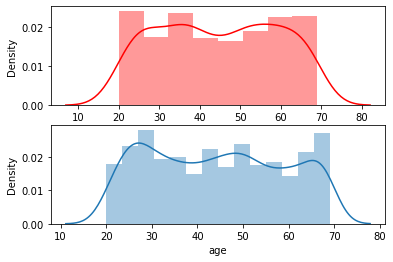

In [49]:
fig,ax=plt.subplots(nrows=2,ncols=1)

sns.distplot(df_merge.query('premium==True').age,ax=ax[0],color='red')
sns.distplot(df_merge.query('premium==False').age,ax=ax[1])

#### Визуализируйте распределение числа успешных операции в зависимости от  клиента

In [51]:
client_success=df_merge. groupby('client')\
        .agg({'success':'sum'})

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

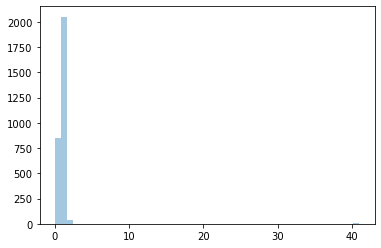

In [53]:
sns.distplot(client_success,kde=False)

#### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки

In [55]:
age_success_number=df_merge.query('platform == "computer"')\
                           .groupby('age',as_index=False)\
                           .agg({'success':'sum'})
age_success_number.head()

,age,success
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot:xlabel='age', ylabel='success'>

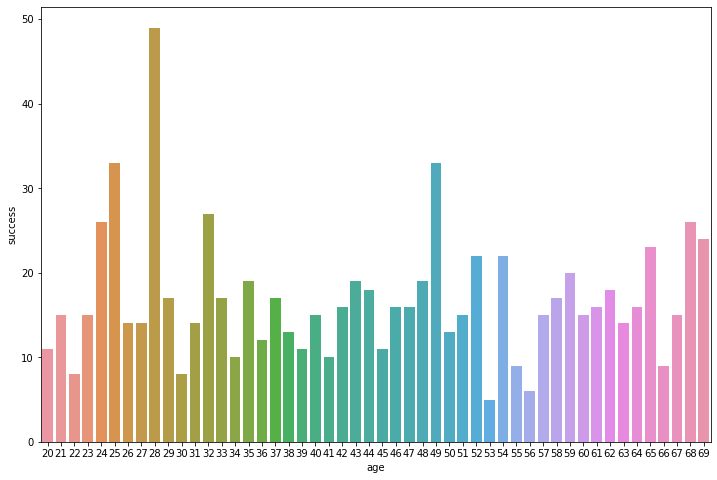

In [57]:
plt.figure(figsize=(12, 8))
sns.barplot(x=age_success_number.age,y=age_success_number.success)